In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import string
import warnings
import pickle

# load video data

In [2]:
# 3d analyzed video path
camera12_analyzed_path = "/ysm-gpfs/pi/jadi/VideoTracker_SocialInter/test_video_cooperative_task_3d/20221021_Dodson_Scorch_camera12/"
camera23_analyzed_path = "/ysm-gpfs/pi/jadi/VideoTracker_SocialInter/test_video_cooperative_task_3d/20221021_Dodson_Scorch_camera23/"

# h5 files for the analyzed videos
camera12_h5_file = camera12_analyzed_path + "20221021_Dodson_Scorch_weikang.h5"
camera23_h5_file = camera23_analyzed_path + "20221021_Dodson_Scorch_weikang.h5"

# h5 files for save 
camera12_h5_file_save = camera12_analyzed_path + "20221021_Dodson_Scorch_weikang.h5"
camera23_h5_file_save = camera23_analyzed_path + "20221021_Dodson_Scorch_weikang.h5"

# meta pickle data for the analyzed videos
camera12_metapickle_file = camera12_analyzed_path + "20221021_Dodson_Scorch_weikang_meta.pickle"
camera23_metapickle_file = camera23_analyzed_path + "20221021_Dodson_Scorch_weikang_meta.pickle"

# load data
camera12_metapickle_data = pd.read_pickle(camera12_metapickle_file)
camera23_metapickle_data = pd.read_pickle(camera23_metapickle_file)

camera12_h5_data = pd.read_hdf(camera12_h5_file)
camera23_h5_data = pd.read_hdf(camera23_h5_file)


In [3]:
camera12_h5_data

scorer         weikang                                                       \
individuals     dodson                                                        
bodyparts    rightTuft                      whiteBlaze                        
coords               x         y          z          x         y          z   
0            -0.696560 -4.018318  14.963746   0.009465 -3.663745  14.099358   
1            -0.647515 -3.981180  14.939265   0.154275 -3.651347  14.042189   
2            -0.531466 -3.906518  14.753322   0.185989 -3.611261  13.910244   
3            -0.475985 -3.897549  14.688633   0.357953 -3.624870  13.913673   
4            -0.407943 -3.843532  14.524401   0.415275 -3.514587  13.818576   
...                ...       ...        ...        ...       ...        ...   
21235       -13.233135 -2.460828  20.247742 -12.135802 -2.448265  20.077989   
21236       -13.235138 -2.463566  20.234137 -12.136569 -2.448545  20.074374   
21237       -13.225809 -2.471071  20.212991 -12.137196 -2.448717  20.071244   
21238       -13.226215 -2.472156  20.210587 -12.137989 -2.448773  20.067408   
21239       -13.226929 -2.476274  20.205335 -12.138200 -2.451271  20.067163   

scorer                                                  ...             \
individuals                                             ...     scorch   
bodyparts     leftTuft                        rightEye  ...   leftTuft   
coords               x         y          z          x  ...          z   
0             0.893506 -3.816093  14.370619  -0.252350  ...  15.880178   
1             0.987550 -3.781943  14.311720  -0.190110  ...  15.984202   
2             1.108637 -3.760516  14.188433  -0.086830  ...  15.910983   
3             1.217632 -3.774356  14.276051  -0.007639  ...  15.935396   
4             1.267234 -3.748719  14.079669   0.104385  ...  16.032550   
...                ...       ...        ...        ...  ...        ...   
21235       -11.316481 -2.688163  20.595004 -12.416928  ...  13.363206   
21236       -11.317740 -2.691973  20.589399 -12.421200  ...  13.365778   
21237       -11.301086 -2.677814  20.550371 -12.419437  ...  13.359001   
21238       -11.308278 -2.681913  20.518526 -12.419854  ...  13.354898   
21239       -11.309526 -2.681434  20.512998 -12.421625  ...  13.352129   

scorer                                                                       \
individuals                                                                   
bodyparts     rightEye                         leftEye                        
coords               x         y          z          x         y          z   
0           -13.265951 -4.071291  15.542177 -12.656909 -4.157362  15.548583   
1           -13.198664 -4.100332  15.660053 -12.552555 -4.165422  15.571532   
2           -13.085751 -4.103259  15.673517 -12.538184 -4.165236  15.632013   
3           -13.061450 -4.100812  15.662766 -12.420274 -4.154008  15.635004   
4           -13.032284 -4.091192  15.677381 -12.366363 -4.161614  15.627819   
...                ...       ...        ...        ...       ...        ...   
21235        -0.820131 -4.766105  13.388783  -0.340932 -4.833331  13.079432   
21236        -0.818904 -4.762874  13.379453  -0.329168 -4.843523  13.088750   
21237        -0.818833 -4.764714  13.378226  -0.326590 -4.841772  13.090184   
21238        -0.820103 -4.767100  13.377514  -0.326705 -4.841895  13.090087   
21239        -0.820164 -4.772786  13.378347  -0.328718 -4.866852  13.159334   

scorer                                       
individuals                                  
bodyparts        mouth                       
coords               x         y          z  
0           -12.884651 -3.525301  15.446373  
1           -12.799645 -3.521928  15.424392  
2           -12.696983 -3.535244  15.406340  
3           -12.673907 -3.573702  15.503886  
4           -12.615909 -3.577841  15.490071  
...                ...       ...        ...  
21235        -0.637742 -4.231434  12.954199  
21236      

In [4]:
# get the fps of the analyzed video
import cv2
video_cam1_file = camera12_analyzed_path + "20221021_Dodson_Scorch_camera-1.mp4"
cam = cv2.VideoCapture(video_cam1_file)
fps1 = cam.get(cv2.CAP_PROP_FPS)
video_cam2_file = camera12_analyzed_path + "20221021_Dodson_Scorch_camera-2.mp4"
cam = cv2.VideoCapture(video_cam2_file)
fps2 = cam.get(cv2.CAP_PROP_FPS)
fps = fps1
fps

29.97002997002997

In [5]:
# aligned with the audio
# get the session start time from "videosound_bhv_sync.py/.ipynb"
# currently the session_start_time will be manually typed in. It can be updated after a better method is used
session_start_time = 27.10 # in second
session_start_frame = session_start_time * fps # fps is 30Hz

In [6]:
# gaze angle threshold
# angle_thres = np.pi/36 # 5 degree
angle_thres = np.pi/18 # 10 degree

# analyze based on camera 1 and camera 2 

In [7]:
# analysis - camera 1 and 2
ncols = camera12_h5_data.shape[1]
nframes = camera12_h5_data.shape[0]
animal_names = []
body_parts = []
xyz_axis = []

for i in np.arange(0,ncols,1):
    animal_names.append(camera12_h5_data.columns[i][1])
    body_parts.append(camera12_h5_data.columns[i][2])
    xyz_axis.append(camera12_h5_data.columns[i][3])
  
    # fill in the nan data point
    data_point = camera12_h5_data.iloc[:,i]
    data_point_filled = data_point.interpolate(method='nearest',limit_direction='both')
    data_point_filled = data_point_filled.interpolate(method='linear',limit_direction='both')
    # smooth the data point   
    # data_point_filtered = data_point_filled.rolling(window=5, win_type='gaussian', center=True).mean(std=0.5)
    #
    # camera12_h5_data.iloc[:,i] = data_point_filled
    
animal_names_unique = pd.unique(animal_names)
print(animal_names_unique)
body_parts_unique = pd.unique(body_parts)
print(body_parts_unique)
xyz_axis_unique = pd.unique(xyz_axis)
print(xyz_axis_unique)

# camera12_h5_data.to_hdf(camera12_h5_file_save, key = "camera12_h5_data")


['dodson' 'scorch']
['rightTuft' 'whiteBlaze' 'leftTuft' 'rightEye' 'leftEye' 'mouth']
['x' 'y' 'z']


In [8]:
# find the location of each body part
body_part_locs = {}
for iname in animal_names_unique:
    for ibody in body_parts_unique:
        ind = np.isin(animal_names,iname) & np.isin(body_parts,ibody)
        body_part_locs[(iname,ibody)] = camera12_h5_data.iloc[:,ind]  
        
        # remove the outlier 
        for iaxis in np.arange(0,3,1):
            # loc_std = np.std(body_part_locs[(iname,ibody)])[iaxis]
            # loc_mean = pd.DataFrame.mean(body_part_locs[(iname,ibody)])[iaxis]
            # ind = (body_part_locs[(iname,ibody)].iloc[:,iaxis]>loc_mean+3*loc_std) | (body_part_locs[(iname,ibody)].iloc[:,iaxis]<loc_mean-3*loc_std)
            # body_part_locs[(iname,ibody)].iloc[:,iaxis][ind] = np.nan
            q1 = np.nanquantile(body_part_locs[(iname,ibody)].iloc[:,iaxis],0.25)
            q3 = np.nanquantile(body_part_locs[(iname,ibody)].iloc[:,iaxis],0.75)
            thres1 = q1 - 1.5*abs(q3-q1)
            thres2 = q3 + 1.5*abs(q3-q1)
            ind = (body_part_locs[(iname,ibody)].iloc[:,iaxis]>thres2) | (body_part_locs[(iname,ibody)].iloc[:,iaxis]<thres1)
            body_part_locs[(iname,ibody)].iloc[:,iaxis][ind] = np.nan
            
body_part_locs_camera12 = body_part_locs

In [9]:
warnings.filterwarnings('ignore')
eye_direction_camera12 = {}
eye_contact_or_not_camera12 = {}
look_at_face_or_not_camera12 = {}
for iname in animal_names_unique:
    eye_dir_frames = []
    eye_contact_frames = []
    look_at_face_frames = []
    for iframe in np.arange(0,nframes,1):
        lefteye_loc = body_part_locs[(iname,'leftEye')].iloc[iframe,:].to_numpy()
        righteye_loc = body_part_locs[(iname,'rightEye')].iloc[iframe,:].to_numpy()
        lefttuft_loc = body_part_locs[(iname,'leftTuft')].iloc[iframe,:].to_numpy()
        righttuft_loc = body_part_locs[(iname,'rightTuft')].iloc[iframe,:].to_numpy()
        whiblz_loc = body_part_locs[(iname,'whiteBlaze')].iloc[iframe,:].to_numpy()
        mouth_loc = body_part_locs[(iname,'mouth')].iloc[iframe,:].to_numpy()
        
        Vect1 = lefteye_loc - righteye_loc
        Vect2 = whiblz_loc - mouth_loc
        Vect3 = lefttuft_loc - lefteye_loc
        Vect4 = righttuft_loc - righteye_loc
        
        try:       
            Vect1 = Vect1 / scipy.linalg.norm(Vect1)
            Vect2 = Vect2 / scipy.linalg.norm(Vect2) 
        except:
            Vect1 = Vect1
            Vect2 = Vect2
        eyesight_dir = np.cross(Vect1, Vect2)
        
        if ((np.dot(eyesight_dir, Vect3)>0) | (np.dot(eyesight_dir, Vect4)>0)):
            eyesight_dir = -eyesight_dir
        
        eye_dir_frames.append(eyesight_dir)
        
        
        # examine whether this animal is looking at the other's eyes or face
        if (iname == animal_names_unique[0]): 
            iname_other = animal_names_unique[1]
        elif (iname == animal_names_unique[1]): 
            iname_other = animal_names_unique[0]
            
        lefteye_loc_other = body_part_locs[(iname_other,'leftEye')].iloc[iframe,:].to_numpy()
        righteye_loc_other = body_part_locs[(iname_other,'rightEye')].iloc[iframe,:].to_numpy()
        lefttuft_loc_other = body_part_locs[(iname_other,'leftTuft')].iloc[iframe,:].to_numpy()
        righttuft_loc_other = body_part_locs[(iname_other,'rightTuft')].iloc[iframe,:].to_numpy()
        whiblz_loc_other = body_part_locs[(iname_other,'whiteBlaze')].iloc[iframe,:].to_numpy()
        mouth_loc_other = body_part_locs[(iname_other,'mouth')].iloc[iframe,:].to_numpy()
        
        # where left eye is looking
        # vector between body part
        vect1_lefteye = lefteye_loc_other - lefteye_loc
        vect2_lefteye = righteye_loc_other - lefteye_loc
        vect3_lefteye = lefttuft_loc_other - lefteye_loc
        vect4_lefteye = righttuft_loc_other - lefteye_loc
        vect5_lefteye = whiblz_loc_other - lefteye_loc
        vect6_lefteye = mouth_loc_other - lefteye_loc
        # angle between body part vector and eyesight direction
        angle1_lefteye =  np.sign(np.dot(eyesight_dir,vect1_lefteye))*np.arccos(np.clip(np.dot(eyesight_dir/np.linalg.norm(eyesight_dir), vect1_lefteye/np.linalg.norm(vect1_lefteye)), -1.0, 1.0))       
        angle2_lefteye =  np.sign(np.dot(eyesight_dir,vect2_lefteye))*np.arccos(np.clip(np.dot(eyesight_dir/np.linalg.norm(eyesight_dir), vect2_lefteye/np.linalg.norm(vect2_lefteye)), -1.0, 1.0))
        angle3_lefteye =  np.sign(np.dot(eyesight_dir,vect3_lefteye))*np.arccos(np.clip(np.dot(eyesight_dir/np.linalg.norm(eyesight_dir), vect3_lefteye/np.linalg.norm(vect3_lefteye)), -1.0, 1.0))
        angle4_lefteye =  np.sign(np.dot(eyesight_dir,vect4_lefteye))*np.arccos(np.clip(np.dot(eyesight_dir/np.linalg.norm(eyesight_dir), vect4_lefteye/np.linalg.norm(vect4_lefteye)), -1.0, 1.0))
        angle5_lefteye =  np.sign(np.dot(eyesight_dir,vect5_lefteye))*np.arccos(np.clip(np.dot(eyesight_dir/np.linalg.norm(eyesight_dir), vect5_lefteye/np.linalg.norm(vect5_lefteye)), -1.0, 1.0))
        angle6_lefteye =  np.sign(np.dot(eyesight_dir,vect6_lefteye))*np.arccos(np.clip(np.dot(eyesight_dir/np.linalg.norm(eyesight_dir), vect6_lefteye/np.linalg.norm(vect6_lefteye)), -1.0, 1.0))
        
        # where right eye is looking
        # vector between body part
        vect1_righteye = lefteye_loc_other - righteye_loc
        vect2_righteye = righteye_loc_other - righteye_loc
        vect3_righteye = lefttuft_loc_other - righteye_loc
        vect4_righteye = righttuft_loc_other - righteye_loc
        vect5_righteye = whiblz_loc_other - righteye_loc
        vect6_righteye = mouth_loc_other - righteye_loc
        # angle between body part vector and eyesight direction
        angle1_righteye =  np.sign(np.dot(eyesight_dir,vect1_righteye))*np.arccos(np.clip(np.dot(eyesight_dir/np.linalg.norm(eyesight_dir), vect1_righteye/np.linalg.norm(vect1_righteye)), -1.0, 1.0))       
        angle2_righteye =  np.sign(np.dot(eyesight_dir,vect2_righteye))*np.arccos(np.clip(np.dot(eyesight_dir/np.linalg.norm(eyesight_dir), vect2_righteye/np.linalg.norm(vect2_righteye)), -1.0, 1.0))
        angle3_righteye =  np.sign(np.dot(eyesight_dir,vect3_righteye))*np.arccos(np.clip(np.dot(eyesight_dir/np.linalg.norm(eyesight_dir), vect3_righteye/np.linalg.norm(vect3_righteye)), -1.0, 1.0))
        angle4_righteye =  np.sign(np.dot(eyesight_dir,vect4_righteye))*np.arccos(np.clip(np.dot(eyesight_dir/np.linalg.norm(eyesight_dir), vect4_righteye/np.linalg.norm(vect4_righteye)), -1.0, 1.0))
        angle5_righteye =  np.sign(np.dot(eyesight_dir,vect5_righteye))*np.arccos(np.clip(np.dot(eyesight_dir/np.linalg.norm(eyesight_dir), vect5_righteye/np.linalg.norm(vect5_righteye)), -1.0, 1.0))
        angle6_righteye =  np.sign(np.dot(eyesight_dir,vect6_righteye))*np.arccos(np.clip(np.dot(eyesight_dir/np.linalg.norm(eyesight_dir), vect6_righteye/np.linalg.norm(vect6_righteye)), -1.0, 1.0))
        
        lefteye_contact_thres = ((angle1_lefteye>0)&(angle1_lefteye<angle_thres))|((angle2_lefteye>0)&(angle2_lefteye<angle_thres))
        lefteye_lookface_thres = ((angle3_lefteye>0)&(angle3_lefteye<angle_thres))|((angle4_lefteye>0)&(angle4_lefteye<angle_thres))|((angle5_lefteye>0)&(angle5_lefteye<angle_thres))|((angle6_lefteye>0)&(angle6_lefteye<angle_thres))
        righteye_contact_thres = ((angle1_righteye>0)&(angle1_righteye<angle_thres))|((angle2_righteye>0)&(angle2_righteye<angle_thres))
        righteye_lookface_thres = ((angle3_righteye>0)&(angle3_righteye<angle_thres))|((angle4_righteye>0)&(angle4_righteye<angle_thres))|((angle5_righteye>0)&(angle5_righteye<angle_thres))|((angle6_righteye>0)&(angle6_righteye<angle_thres))
        
        eye_contact_frames.append(np.int(lefteye_contact_thres|righteye_contact_thres))
        look_at_face_frames.append(np.int(lefteye_contact_thres|righteye_contact_thres|lefteye_lookface_thres|righteye_lookface_thres))
        
    # save to the summarized data
    eye_direction_camera12[(iname)] = eye_dir_frames
    eye_contact_or_not_camera12[(iname)] = eye_contact_frames
    look_at_face_or_not_camera12[(iname)] = look_at_face_frames
        

In [10]:
eye_direction_camera12['time_in_second'] = np.arange(0,np.shape(eye_direction_camera12['dodson'])[0],1)/30 - session_start_time
eye_contact_or_not_camera12['time_in_second'] = np.arange(0,np.shape(eye_contact_or_not_camera12['dodson'])[0],1)/30 - session_start_time
look_at_face_or_not_camera12['time_in_second'] = np.arange(0,np.shape(look_at_face_or_not_camera12['dodson'])[0],1)/30 - session_start_time

In [11]:
# sanity check
np.where(np.array(eye_contact_or_not_camera12['scorch'])==1)

(array([ 8369, 12448, 12450]),)

In [12]:
# sanity check
np.where(np.array(eye_contact_or_not_camera12['dodson'])==1)

(array([ 9235, 12920, 20705]),)

In [13]:
# save data
with open(camera12_analyzed_path + 'body_part_locs_camera12.pkl', 'wb') as f:
    pickle.dump(body_part_locs_camera12, f)
with open(camera12_analyzed_path + 'eye_direction_camera12.pkl', 'wb') as f:
    pickle.dump(eye_direction_camera12, f)
with open(camera12_analyzed_path + 'eye_contact_or_not_camera12.pkl', 'wb') as f:
    pickle.dump(eye_contact_or_not_camera12, f)
with open(camera12_analyzed_path + 'look_at_face_or_not_camera12.pkl', 'wb') as f:
    pickle.dump(look_at_face_or_not_camera12, f)
## read
# with open(camera12_analyzed_path + 'body_part_locs_camera12.pkl', 'rb') as f:
#     data = pickle.load(f) 


# analyze based on camera 2 and camera 3 

In [14]:
# analysis - camera 2 and 3
ncols = camera23_h5_data.shape[1]
nframes = camera23_h5_data.shape[0]
animal_names = []
body_parts = []
xyz_axis = []

for i in np.arange(0,ncols,1):
    animal_names.append(camera23_h5_data.columns[i][1])
    body_parts.append(camera23_h5_data.columns[i][2])
    xyz_axis.append(camera23_h5_data.columns[i][3])
  
    # fill in the nan data point
    data_point = camera23_h5_data.iloc[:,i]
    data_point_filled = data_point.interpolate(method='nearest',limit_direction='both')
    data_point_filled = data_point_filled.interpolate(method='linear',limit_direction='both')
    # smooth the data point   
    # data_point_filtered = data_point_filled.rolling(window=5, win_type='gaussian', center=True).mean(std=0.5)
    #
    # camera23_h5_data.iloc[:,i] = data_point_filled
    
animal_names_unique = pd.unique(animal_names)
print(animal_names_unique)
body_parts_unique = pd.unique(body_parts)
print(body_parts_unique)

# camera23_h5_data.to_hdf(camera23_h5_file_save, key = "camera23_h5_data")


['dodson' 'scorch']
['rightTuft' 'whiteBlaze' 'leftTuft' 'rightEye' 'leftEye' 'mouth']


In [15]:
# find the location of each body part
body_part_locs = {}
for iname in animal_names_unique:
    for ibody in body_parts_unique:
        ind = np.isin(animal_names,iname) & np.isin(body_parts,ibody)
        body_part_locs[(iname,ibody)] = camera23_h5_data.iloc[:,ind]    
        
        # remove the outlier 
        for iaxis in np.arange(0,3,1):
            # loc_std = np.std(body_part_locs[(iname,ibody)])[iaxis]
            # loc_mean = pd.DataFrame.mean(body_part_locs[(iname,ibody)])[iaxis]
            # ind = (body_part_locs[(iname,ibody)].iloc[:,iaxis]>loc_mean+3*loc_std) | (body_part_locs[(iname,ibody)].iloc[:,iaxis]<loc_mean-3*loc_std)
            # body_part_locs[(iname,ibody)].iloc[:,iaxis][ind] = np.nan
            q1 = np.nanquantile(body_part_locs[(iname,ibody)].iloc[:,iaxis],0.25)
            q3 = np.nanquantile(body_part_locs[(iname,ibody)].iloc[:,iaxis],0.75)
            thres1 = q1 - 1.5*abs(q3-q1)
            thres2 = q3 + 1.5*abs(q3-q1)
            ind = (body_part_locs[(iname,ibody)].iloc[:,iaxis]>thres2) | (body_part_locs[(iname,ibody)].iloc[:,iaxis]<thres1)
            body_part_locs[(iname,ibody)].iloc[:,iaxis][ind] = np.nan
            
body_part_locs_camera23 = body_part_locs

In [16]:
warnings.filterwarnings('ignore')
eye_direction_camera23 = {}
eye_contact_or_not_camera23 = {}
look_at_face_or_not_camera23 = {}
for iname in animal_names_unique:
    eye_dir_frames = []
    eye_contact_frames = []
    look_at_face_frames = []
    for iframe in np.arange(0,nframes,1):
        lefteye_loc = body_part_locs[(iname,'leftEye')].iloc[iframe,:].to_numpy()
        righteye_loc = body_part_locs[(iname,'rightEye')].iloc[iframe,:].to_numpy()
        lefttuft_loc = body_part_locs[(iname,'leftTuft')].iloc[iframe,:].to_numpy()
        righttuft_loc = body_part_locs[(iname,'rightTuft')].iloc[iframe,:].to_numpy()
        whiblz_loc = body_part_locs[(iname,'whiteBlaze')].iloc[iframe,:].to_numpy()
        mouth_loc = body_part_locs[(iname,'mouth')].iloc[iframe,:].to_numpy()
        
        Vect1 = lefteye_loc - righteye_loc
        Vect2 = whiblz_loc - mouth_loc
        Vect3 = lefttuft_loc - lefteye_loc
        Vect4 = righttuft_loc - righteye_loc
        
        try:       
            Vect1 = Vect1 / scipy.linalg.norm(Vect1)
            Vect2 = Vect2 / scipy.linalg.norm(Vect2) 
        except:
            Vect1 = Vect1
            Vect2 = Vect2
        eyesight_dir = np.cross(Vect1, Vect2)
        
        if ((np.dot(eyesight_dir, Vect3)>0) | (np.dot(eyesight_dir, Vect4)>0)):
            eyesight_dir = -eyesight_dir
        
        eye_dir_frames.append(eyesight_dir)
        
        
        # examine whether this animal is looking at the other's eyes or face
        if (iname == animal_names_unique[0]): 
            iname_other = animal_names_unique[1]
        elif (iname == animal_names_unique[1]): 
            iname_other = animal_names_unique[0]
            
        lefteye_loc_other = body_part_locs[(iname_other,'leftEye')].iloc[iframe,:].to_numpy()
        righteye_loc_other = body_part_locs[(iname_other,'rightEye')].iloc[iframe,:].to_numpy()
        lefttuft_loc_other = body_part_locs[(iname_other,'leftTuft')].iloc[iframe,:].to_numpy()
        righttuft_loc_other = body_part_locs[(iname_other,'rightTuft')].iloc[iframe,:].to_numpy()
        whiblz_loc_other = body_part_locs[(iname_other,'whiteBlaze')].iloc[iframe,:].to_numpy()
        mouth_loc_other = body_part_locs[(iname_other,'mouth')].iloc[iframe,:].to_numpy()
        
        # where left eye is looking
        # vector between body part
        vect1_lefteye = lefteye_loc_other - lefteye_loc
        vect2_lefteye = righteye_loc_other - lefteye_loc
        vect3_lefteye = lefttuft_loc_other - lefteye_loc
        vect4_lefteye = righttuft_loc_other - lefteye_loc
        vect5_lefteye = whiblz_loc_other - lefteye_loc
        vect6_lefteye = mouth_loc_other - lefteye_loc
        # angle between body part vector and eyesight direction
        angle1_lefteye =  np.sign(np.dot(eyesight_dir,vect1_lefteye))*np.arccos(np.clip(np.dot(eyesight_dir/np.linalg.norm(eyesight_dir), vect1_lefteye/np.linalg.norm(vect1_lefteye)), -1.0, 1.0))       
        angle2_lefteye =  np.sign(np.dot(eyesight_dir,vect2_lefteye))*np.arccos(np.clip(np.dot(eyesight_dir/np.linalg.norm(eyesight_dir), vect2_lefteye/np.linalg.norm(vect2_lefteye)), -1.0, 1.0))
        angle3_lefteye =  np.sign(np.dot(eyesight_dir,vect3_lefteye))*np.arccos(np.clip(np.dot(eyesight_dir/np.linalg.norm(eyesight_dir), vect3_lefteye/np.linalg.norm(vect3_lefteye)), -1.0, 1.0))
        angle4_lefteye =  np.sign(np.dot(eyesight_dir,vect4_lefteye))*np.arccos(np.clip(np.dot(eyesight_dir/np.linalg.norm(eyesight_dir), vect4_lefteye/np.linalg.norm(vect4_lefteye)), -1.0, 1.0))
        angle5_lefteye =  np.sign(np.dot(eyesight_dir,vect5_lefteye))*np.arccos(np.clip(np.dot(eyesight_dir/np.linalg.norm(eyesight_dir), vect5_lefteye/np.linalg.norm(vect5_lefteye)), -1.0, 1.0))
        angle6_lefteye =  np.sign(np.dot(eyesight_dir,vect6_lefteye))*np.arccos(np.clip(np.dot(eyesight_dir/np.linalg.norm(eyesight_dir), vect6_lefteye/np.linalg.norm(vect6_lefteye)), -1.0, 1.0))
        
        # where right eye is looking
        # vector between body part
        vect1_righteye = lefteye_loc_other - righteye_loc
        vect2_righteye = righteye_loc_other - righteye_loc
        vect3_righteye = lefttuft_loc_other - righteye_loc
        vect4_righteye = righttuft_loc_other - righteye_loc
        vect5_righteye = whiblz_loc_other - righteye_loc
        vect6_righteye = mouth_loc_other - righteye_loc
        # angle between body part vector and eyesight direction
        angle1_righteye =  np.sign(np.dot(eyesight_dir,vect1_righteye))*np.arccos(np.clip(np.dot(eyesight_dir/np.linalg.norm(eyesight_dir), vect1_righteye/np.linalg.norm(vect1_righteye)), -1.0, 1.0))       
        angle2_righteye =  np.sign(np.dot(eyesight_dir,vect2_righteye))*np.arccos(np.clip(np.dot(eyesight_dir/np.linalg.norm(eyesight_dir), vect2_righteye/np.linalg.norm(vect2_righteye)), -1.0, 1.0))
        angle3_righteye =  np.sign(np.dot(eyesight_dir,vect3_righteye))*np.arccos(np.clip(np.dot(eyesight_dir/np.linalg.norm(eyesight_dir), vect3_righteye/np.linalg.norm(vect3_righteye)), -1.0, 1.0))
        angle4_righteye =  np.sign(np.dot(eyesight_dir,vect4_righteye))*np.arccos(np.clip(np.dot(eyesight_dir/np.linalg.norm(eyesight_dir), vect4_righteye/np.linalg.norm(vect4_righteye)), -1.0, 1.0))
        angle5_righteye =  np.sign(np.dot(eyesight_dir,vect5_righteye))*np.arccos(np.clip(np.dot(eyesight_dir/np.linalg.norm(eyesight_dir), vect5_righteye/np.linalg.norm(vect5_righteye)), -1.0, 1.0))
        angle6_righteye =  np.sign(np.dot(eyesight_dir,vect6_righteye))*np.arccos(np.clip(np.dot(eyesight_dir/np.linalg.norm(eyesight_dir), vect6_righteye/np.linalg.norm(vect6_righteye)), -1.0, 1.0))
        
        lefteye_contact_thres = ((angle1_lefteye>0)&(angle1_lefteye<angle_thres))|((angle2_lefteye>0)&(angle2_lefteye<angle_thres))
        lefteye_lookface_thres = ((angle3_lefteye>0)&(angle3_lefteye<angle_thres))|((angle4_lefteye>0)&(angle4_lefteye<angle_thres))|((angle5_lefteye>0)&(angle5_lefteye<angle_thres))|((angle6_lefteye>0)&(angle6_lefteye<angle_thres))
        righteye_contact_thres = ((angle1_righteye>0)&(angle1_righteye<angle_thres))|((angle2_righteye>0)&(angle2_righteye<angle_thres))
        righteye_lookface_thres = ((angle3_righteye>0)&(angle3_righteye<angle_thres))|((angle4_righteye>0)&(angle4_righteye<angle_thres))|((angle5_righteye>0)&(angle5_righteye<angle_thres))|((angle6_righteye>0)&(angle6_righteye<angle_thres))
        
        eye_contact_frames.append(np.int(lefteye_contact_thres|righteye_contact_thres))
        look_at_face_frames.append(np.int(lefteye_contact_thres|righteye_contact_thres|lefteye_lookface_thres|righteye_lookface_thres))
        
    # save to the summarized data
    eye_direction_camera23[(iname)] = eye_dir_frames
    eye_contact_or_not_camera23[(iname)] = eye_contact_frames
    look_at_face_or_not_camera23[(iname)] = look_at_face_frames
        

In [17]:
eye_direction_camera23['time_in_second'] = np.arange(0,np.shape(eye_direction_camera23['dodson'])[0],1)/30 - session_start_time
eye_contact_or_not_camera23['time_in_second'] = np.arange(0,np.shape(eye_contact_or_not_camera23['dodson'])[0],1)/30 - session_start_time
look_at_face_or_not_camera23['time_in_second'] = np.arange(0,np.shape(look_at_face_or_not_camera23['dodson'])[0],1)/30 - session_start_time

In [18]:
# sanity check
np.where(np.array(eye_contact_or_not_camera23['scorch'])==1)

(array([  982,   983, 10614]),)

In [19]:
# sanity check
np.where(np.array(eye_contact_or_not_camera23['dodson'])==1)

(array([  253,   254,   274,   275,   276,   277,   278,   587,   588,
          589,   590,   591,   810,   878,  9106,  9107,  9108,  9110,
         9874, 18940, 18941, 19193, 19194, 19195, 19196, 19197, 19981,
        19982, 19983, 19987, 19988, 19989, 19990, 19991, 19992, 19993,
        19994]),)

In [20]:
# save data
with open(camera23_analyzed_path + 'body_part_locs_camera23.pkl', 'wb') as f:
    pickle.dump(body_part_locs_camera23, f)
with open(camera23_analyzed_path + 'eye_direction_camera23.pkl', 'wb') as f:
    pickle.dump(eye_direction_camera23, f)
with open(camera23_analyzed_path + 'eye_contact_or_not_camera23.pkl', 'wb') as f:
    pickle.dump(eye_contact_or_not_camera23, f)
with open(camera23_analyzed_path + 'look_at_face_or_not_camera23.pkl', 'wb') as f:
    pickle.dump(look_at_face_or_not_camera23, f)
## read
# with open(camera23_analyzed_path + 'body_part_locs_camera23.pkl', 'rb') as f:
#     data = pickle.load(f) 


# examine the relationship between camera pairs
## make the 3d space aligned with each pair

In [8]:
# load data
try:
    ## read
    with open(camera23_analyzed_path + 'body_part_locs_camera23.pkl', 'rb') as f:
        body_part_locs_camera23 = pickle.load(f) 
    with open(camera12_analyzed_path + 'body_part_locs_camera12.pkl', 'rb') as f:
        body_part_locs_camera12 = pickle.load(f) 
except:
    print("did not save data")

In [9]:
# sanity check 
xxx = body_part_locs_camera23[('dodson','leftEye')].iloc[:,0]
yyy = body_part_locs_camera12[('dodson','leftEye')].iloc[:,0]

In [10]:
min_length = np.min([np.shape(xxx)[0],np.shape(yyy)[0]])
xxx = xxx[np.arange(0,min_length,1)]
yyy = yyy[np.arange(0,min_length,1)]

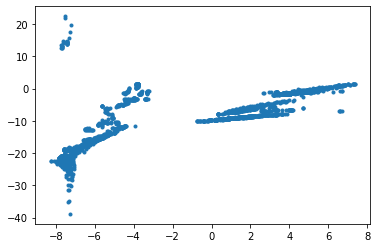

In [11]:
plt.plot(xxx,yyy,'.')

In [12]:
# try the rotation on all possible pairs
RR_sum = {}
tt_sum = {}
err_sum = {}
for iname in animal_names_unique:
    for ibody in body_parts_unique:
        xxx = body_part_locs_camera23[(iname,ibody)]
        yyy = body_part_locs_camera12[(iname,ibody)]
        min_lengh = np.min([xxx.shape[0],yyy.shape[0]])
        
        xxx = xxx.loc[np.arange(0,min_length,1),:]
        yyy = yyy.loc[np.arange(0,min_length,1),:]     
        
        ind_good = (~np.isnan(xxx.iloc[:,0]) & ~np.isnan(xxx.iloc[:,1]) & ~np.isnan(xxx.iloc[:,2])) & (~np.isnan(yyy.iloc[:,0]) & ~np.isnan(yyy.iloc[:,1]) & ~np.isnan(yyy.iloc[:,2])) 
        xxx_values = pd.DataFrame.transpose(xxx.loc[ind_good,:]).values
        yyy_values = pd.DataFrame.transpose(yyy.loc[ind_good,:]).values
        
        xxx_centroid = np.dot(np.mean(xxx_values,axis = 1).reshape(3,1), np.ones((1,np.shape(xxx_values)[1])))
        yyy_centroid = np.dot(np.mean(yyy_values,axis = 1).reshape(3,1), np.ones((1,np.shape(xxx_values)[1])))
        HH = np.dot((xxx_values - xxx_centroid), np.transpose(yyy_values - yyy_centroid))
        u, s, vh = np.linalg.svd(HH, full_matrices=True)
        RR = np.dot(np.transpose(vh),np.transpose(u))
        tt= yyy_centroid - np.dot(RR,xxx_centroid)
        tt = tt[:,1].reshape(3,1)
        
        RR_sum[(iname,ibody)] = RR
        tt_sum[(iname,ibody)] = tt
        err_sum[(iname,ibody)] = np.sum(np.square(yyy_values - (np.dot(RR,xxx_values)+np.dot(tt, np.ones((1,np.shape(xxx_values)[1]))))))

RR = RR_sum[min(err_sum, key=err_sum.get)]
tt = tt_sum[min(err_sum, key=err_sum.get)]


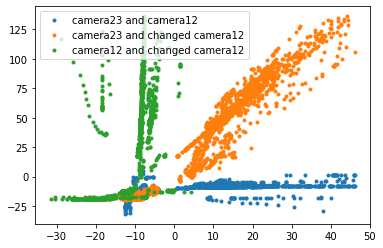

In [13]:
# sanity check
xxx_plot = np.transpose(body_part_locs_camera23[('scorch','leftTuft')].loc[np.arange(0,min_length,1),:].values)
yyy_plot = np.transpose(body_part_locs_camera12[('scorch','leftTuft')].loc[np.arange(0,min_length,1),:].values)
yyy_change = np.dot(RR,xxx_plot)
tt_change = np.dot(tt, np.ones((1,np.shape(xxx_plot)[1])))
yyy_change = np.dot(RR,xxx_plot) + tt_change
plt.plot(xxx_plot[0,:],yyy_plot[0,:],'.')
plt.plot(xxx_plot[0,:],yyy_change[0,:],'.')
plt.plot(yyy_plot[0,:],yyy_change[0,:],'.')
plt.legend(['camera23 and camera12','camera23 and changed camera12','camera12 and changed camera12'])

## merge the bhv from the two pairs of camera and redo the analysis

In [14]:
# merge the two pairs of cameras
body_part_locs_merge = {}
for iname in animal_names_unique:
    for ibody in body_parts_unique:
        RR = RR_sum[(iname,ibody)]
        tt = tt_sum[(iname,ibody)]
        body_part_x = np.transpose(body_part_locs_camera23[(iname,ibody)].loc[np.arange(0,min_length,1),:])
        body_part_project = np.transpose(np.dot(RR,body_part_x) + np.dot(tt, np.ones((1,np.shape(body_part_x)[1]))))
        body_part_origin = body_part_locs_camera12[(iname,ibody)].loc[np.arange(0,min_length,1),:].values
        body_part_origin[np.sum(np.isnan(body_part_origin),axis=1)>0,:] = body_part_project[np.sum(np.isnan(body_part_origin),axis=1)>0,:]

        body_part_locs_merge[(iname,ibody)] = body_part_origin
        

In [15]:
warnings.filterwarnings('ignore')
eye_direction_merge = {}
eye_contact_or_not_merge = {}
look_at_face_or_not_merge = {}
for iname in animal_names_unique:
    eye_dir_frames = []
    eye_contact_frames = []
    look_at_face_frames = []
    for iframe in np.arange(0,min_length,1):
        lefteye_loc = body_part_locs_merge[(iname,'leftEye')][iframe,:]
        righteye_loc = body_part_locs_merge[(iname,'rightEye')][iframe,:]
        lefttuft_loc = body_part_locs_merge[(iname,'leftTuft')][iframe,:]
        righttuft_loc = body_part_locs_merge[(iname,'rightTuft')][iframe,:]
        whiblz_loc = body_part_locs_merge[(iname,'whiteBlaze')][iframe,:]
        mouth_loc = body_part_locs_merge[(iname,'mouth')][iframe,:]
        
        Vect1 = lefteye_loc - righteye_loc
        Vect2 = whiblz_loc - mouth_loc
        Vect3 = lefttuft_loc - lefteye_loc
        Vect4 = righttuft_loc - righteye_loc
        
        try:       
            Vect1 = Vect1 / scipy.linalg.norm(Vect1)
            Vect2 = Vect2 / scipy.linalg.norm(Vect2) 
        except:
            Vect1 = Vect1
            Vect2 = Vect2
        eyesight_dir = np.cross(Vect1, Vect2)
        
        if ((np.dot(eyesight_dir, Vect3)>0) | (np.dot(eyesight_dir, Vect4)>0)):
            eyesight_dir = -eyesight_dir
        
        eye_dir_frames.append(eyesight_dir)
        
        
        # examine whether this animal is looking at the other's eyes or face
        if (iname == animal_names_unique[0]): 
            iname_other = animal_names_unique[1]
        elif (iname == animal_names_unique[1]): 
            iname_other = animal_names_unique[0]
            
        lefteye_loc_other = body_part_locs_merge[(iname_other,'leftEye')][iframe,:]
        righteye_loc_other = body_part_locs_merge[(iname_other,'rightEye')][iframe,:]
        lefttuft_loc_other = body_part_locs_merge[(iname_other,'leftTuft')][iframe,:]
        righttuft_loc_other = body_part_locs_merge[(iname_other,'rightTuft')][iframe,:]
        whiblz_loc_other = body_part_locs_merge[(iname_other,'whiteBlaze')][iframe,:]
        mouth_loc_other = body_part_locs_merge[(iname_other,'mouth')][iframe,:]
        
        # where left eye is looking
        # vector between body part
        vect1_lefteye = lefteye_loc_other - lefteye_loc
        vect2_lefteye = righteye_loc_other - lefteye_loc
        vect3_lefteye = lefttuft_loc_other - lefteye_loc
        vect4_lefteye = righttuft_loc_other - lefteye_loc
        vect5_lefteye = whiblz_loc_other - lefteye_loc
        vect6_lefteye = mouth_loc_other - lefteye_loc
        # angle between body part vector and eyesight direction
        angle1_lefteye =  np.sign(np.dot(eyesight_dir,vect1_lefteye))*np.arccos(np.clip(np.dot(eyesight_dir/np.linalg.norm(eyesight_dir), vect1_lefteye/np.linalg.norm(vect1_lefteye)), -1.0, 1.0))       
        angle2_lefteye =  np.sign(np.dot(eyesight_dir,vect2_lefteye))*np.arccos(np.clip(np.dot(eyesight_dir/np.linalg.norm(eyesight_dir), vect2_lefteye/np.linalg.norm(vect2_lefteye)), -1.0, 1.0))
        angle3_lefteye =  np.sign(np.dot(eyesight_dir,vect3_lefteye))*np.arccos(np.clip(np.dot(eyesight_dir/np.linalg.norm(eyesight_dir), vect3_lefteye/np.linalg.norm(vect3_lefteye)), -1.0, 1.0))
        angle4_lefteye =  np.sign(np.dot(eyesight_dir,vect4_lefteye))*np.arccos(np.clip(np.dot(eyesight_dir/np.linalg.norm(eyesight_dir), vect4_lefteye/np.linalg.norm(vect4_lefteye)), -1.0, 1.0))
        angle5_lefteye =  np.sign(np.dot(eyesight_dir,vect5_lefteye))*np.arccos(np.clip(np.dot(eyesight_dir/np.linalg.norm(eyesight_dir), vect5_lefteye/np.linalg.norm(vect5_lefteye)), -1.0, 1.0))
        angle6_lefteye =  np.sign(np.dot(eyesight_dir,vect6_lefteye))*np.arccos(np.clip(np.dot(eyesight_dir/np.linalg.norm(eyesight_dir), vect6_lefteye/np.linalg.norm(vect6_lefteye)), -1.0, 1.0))
        
        # where right eye is looking
        # vector between body part
        vect1_righteye = lefteye_loc_other - righteye_loc
        vect2_righteye = righteye_loc_other - righteye_loc
        vect3_righteye = lefttuft_loc_other - righteye_loc
        vect4_righteye = righttuft_loc_other - righteye_loc
        vect5_righteye = whiblz_loc_other - righteye_loc
        vect6_righteye = mouth_loc_other - righteye_loc
        # angle between body part vector and eyesight direction
        angle1_righteye =  np.sign(np.dot(eyesight_dir,vect1_righteye))*np.arccos(np.clip(np.dot(eyesight_dir/np.linalg.norm(eyesight_dir), vect1_righteye/np.linalg.norm(vect1_righteye)), -1.0, 1.0))       
        angle2_righteye =  np.sign(np.dot(eyesight_dir,vect2_righteye))*np.arccos(np.clip(np.dot(eyesight_dir/np.linalg.norm(eyesight_dir), vect2_righteye/np.linalg.norm(vect2_righteye)), -1.0, 1.0))
        angle3_righteye =  np.sign(np.dot(eyesight_dir,vect3_righteye))*np.arccos(np.clip(np.dot(eyesight_dir/np.linalg.norm(eyesight_dir), vect3_righteye/np.linalg.norm(vect3_righteye)), -1.0, 1.0))
        angle4_righteye =  np.sign(np.dot(eyesight_dir,vect4_righteye))*np.arccos(np.clip(np.dot(eyesight_dir/np.linalg.norm(eyesight_dir), vect4_righteye/np.linalg.norm(vect4_righteye)), -1.0, 1.0))
        angle5_righteye =  np.sign(np.dot(eyesight_dir,vect5_righteye))*np.arccos(np.clip(np.dot(eyesight_dir/np.linalg.norm(eyesight_dir), vect5_righteye/np.linalg.norm(vect5_righteye)), -1.0, 1.0))
        angle6_righteye =  np.sign(np.dot(eyesight_dir,vect6_righteye))*np.arccos(np.clip(np.dot(eyesight_dir/np.linalg.norm(eyesight_dir), vect6_righteye/np.linalg.norm(vect6_righteye)), -1.0, 1.0))
        
        lefteye_contact_thres = ((angle1_lefteye>0)&(angle1_lefteye<angle_thres))|((angle2_lefteye>0)&(angle2_lefteye<angle_thres))
        lefteye_lookface_thres = ((angle3_lefteye>0)&(angle3_lefteye<angle_thres))|((angle4_lefteye>0)&(angle4_lefteye<angle_thres))|((angle5_lefteye>0)&(angle5_lefteye<angle_thres))|((angle6_lefteye>0)&(angle6_lefteye<angle_thres))
        righteye_contact_thres = ((angle1_righteye>0)&(angle1_righteye<angle_thres))|((angle2_righteye>0)&(angle2_righteye<angle_thres))
        righteye_lookface_thres = ((angle3_righteye>0)&(angle3_righteye<angle_thres))|((angle4_righteye>0)&(angle4_righteye<angle_thres))|((angle5_righteye>0)&(angle5_righteye<angle_thres))|((angle6_righteye>0)&(angle6_righteye<angle_thres))
        
        eye_contact_frames.append(np.int(lefteye_contact_thres|righteye_contact_thres))
        look_at_face_frames.append(np.int(lefteye_contact_thres|righteye_contact_thres|lefteye_lookface_thres|righteye_lookface_thres))
        
    # save to the summarized data
    eye_direction_merge[(iname)] = eye_dir_frames
    eye_contact_or_not_merge[(iname)] = eye_contact_frames
    look_at_face_or_not_merge[(iname)] = look_at_face_frames
        

In [16]:
eye_direction_merge['time_in_second'] = np.arange(0,np.shape(eye_direction_merge['dodson'])[0],1)/30 - session_start_time
eye_contact_or_not_merge['time_in_second'] = np.arange(0,np.shape(eye_contact_or_not_merge['dodson'])[0],1)/30 - session_start_time
look_at_face_or_not_merge['time_in_second'] = np.arange(0,np.shape(look_at_face_or_not_merge['dodson'])[0],1)/30 - session_start_time

## load behavioral results

In [17]:
# load behavioral results
try:
    bhv_data_path = "/home/ws523/marmoset_tracking_bhv_data_from_task_code/20221021_Dodson_Scorch/"
    trial_record_json = bhv_data_path + "20221021_Scorch_Dodson_TrialRecord_1.json"
    bhv_data_json = bhv_data_path + "20221021_Scorch_Dodson_bhv_data_1.json"
    session_info_json = bhv_data_path + "20221021_Scorch_Dodson_session_info_1.json"
    #
    trial_record = pd.read_json(trial_record_json)
    bhv_data = pd.read_json(bhv_data_json)
    session_info = pd.read_json(session_info_json)
except:
    bhv_data_path = "/home/ws523/marmoset_tracking_bhv_data_from_task_code/20221021_Dodson_Scorch/"
    trial_record_json = bhv_data_path + "20221021_Dodson_Scorch_TrialRecord_1.json"
    bhv_data_json = bhv_data_path + "20221021_Dodson_Scorch_bhv_data_1.json"
    session_info_json = bhv_data_path + "20221021_Dodson_Scorch_session_info_1.json"
    #
    trial_record = pd.read_json(trial_record_json)
    bhv_data = pd.read_json(bhv_data_json)
    session_info = pd.read_json(session_info_json)

In [18]:
animal1 = session_info['lever1_animal'][0].lower()
animal2 = session_info['lever2_animal'][0].lower()

In [19]:
# clean up the trial_record
warnings.filterwarnings('ignore')
trial_record_clean = pd.DataFrame(columns=trial_record.columns)
for itrial in np.arange(0,np.max(trial_record['trial_number']),1):
    # trial_record_clean.loc[itrial] = trial_record[trial_record['trial_number']==itrial+1].iloc[[0]]
    trial_record_clean = trial_record_clean.append(trial_record[trial_record['trial_number']==itrial+1].iloc[[0]])
trial_record_clean = trial_record_clean.reset_index(drop = True)

In [20]:
# change bhv_data time to the absolute time
time_points_new = pd.DataFrame(np.zeros(np.shape(bhv_data)[0]),columns=["time_points_new"])
for itrial in np.arange(0,np.max(trial_record_clean['trial_number']),1):
    ind = bhv_data["trial_number"]==itrial+1
    new_time_itrial = bhv_data[ind]["time_points"] + trial_record_clean["trial_starttime"].iloc[itrial]
    time_points_new["time_points_new"][ind] = new_time_itrial
bhv_data["time_points"] = time_points_new["time_points_new"]

## plot behavioral results (with camera pair merged) and eye contact results

In [21]:
time_point_pull1 = bhv_data["time_points"][bhv_data["behavior_events"]==1]
time_point_pull2 = bhv_data["time_points"][bhv_data["behavior_events"]==2]
ind_lookatotherface1 = np.where(np.array(look_at_face_or_not_merge[animal1])==1)
time_point_lookatotherface1 = look_at_face_or_not_merge["time_in_second"][ind_lookatotherface1]
ind_lookatotherface2 = np.where(np.array(look_at_face_or_not_merge[animal2])==1)
time_point_lookatotherface2 = look_at_face_or_not_merge["time_in_second"][ind_lookatotherface2]

ind_eyecontact1 = np.where(np.array(eye_contact_or_not_merge[animal1])==1)
time_point_eyecontact1 = eye_contact_or_not_merge["time_in_second"][ind_eyecontact1]
ind_eyecontact2 = np.where(np.array(eye_contact_or_not_merge[animal2])==1)
time_point_eyecontact2 = eye_contact_or_not_merge["time_in_second"][ind_eyecontact2]

# calculate the oneway gaze or mutual gaze
animal1_gaze = np.round(np.concatenate((time_point_eyecontact1,time_point_lookatotherface1)),1)
animal1_gaze = np.unique(np.sort(animal1_gaze))
animal2_gaze = np.round(np.concatenate((time_point_eyecontact2,time_point_lookatotherface2)),1)
animal2_gaze = np.unique(np.sort(animal2_gaze))

ngaze1 = len(animal1_gaze)
ngaze2 = len(animal2_gaze)
oneway_gaze1 = []
oneway_gaze2 = []
mutual_gaze1 = []
mutual_gaze2 = []
# 
for igaze1 in np.arange(0, ngaze1, 1):
    for igaze2 in np.arange(0,ngaze2,1):
        if abs(animal1_gaze[igaze1]-animal2_gaze[igaze2])<1:
            mutual_gaze1.append(animal1_gaze[igaze1])
            mutual_gaze2.append(animal2_gaze[igaze2])
mutual_gaze1 = np.unique(mutual_gaze1)   
mutual_gaze2 = np.unique(mutual_gaze2)
oneway_gaze1 = animal1_gaze[~np.isin(animal1_gaze,mutual_gaze1)]
oneway_gaze2 = animal2_gaze[~np.isin(animal2_gaze,mutual_gaze2)]

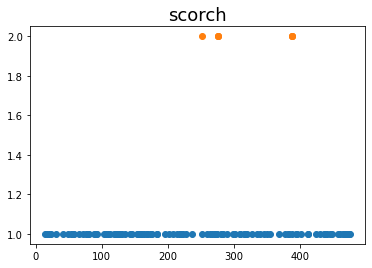

In [22]:
time_point_pull1 = np.round(time_point_pull1,2)
ind_plot = time_point_pull1 < (720 - session_start_time)
plt.plot(time_point_pull1[ind_plot], np.ones(np.shape(time_point_pull1[ind_plot])[0]),'o')
plt.plot(oneway_gaze1, np.ones(np.shape(oneway_gaze1)[0])*2,'o')
plt.plot(mutual_gaze1, np.ones(np.shape(mutual_gaze1)[0])*3,'o')
plt.title(animal1,fontsize = 18);

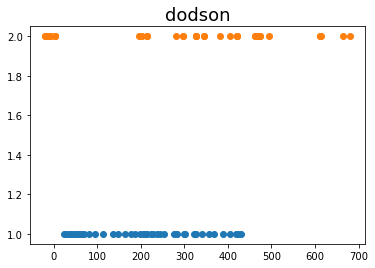

In [23]:
time_point_pull2 = np.round(time_point_pull2,2)
ind_plot = time_point_pull2 < (720 - session_start_time)
plt.plot(time_point_pull2[ind_plot], np.ones(np.shape(time_point_pull2[ind_plot])[0]),'o')
plt.plot(oneway_gaze2, np.ones(np.shape(oneway_gaze2)[0])*2,'o')
plt.plot(mutual_gaze2, np.ones(np.shape(mutual_gaze2)[0])*3,'o')
plt.title(animal2,fontsize = 18);

In [24]:
(mutual_gaze1+session_start_time)/60

array([], dtype=float64)

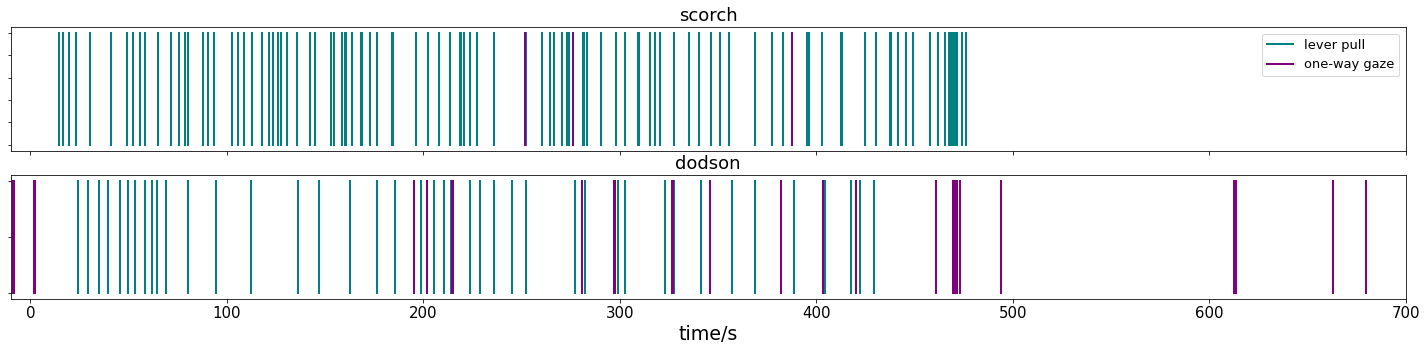

In [25]:
fig, axs = plt.subplots(2,1)
fig.set_figheight(5)
fig.set_figwidth(25)
# plot for animal 1
ind_plot = time_point_pull1 < (720 - session_start_time)
#for itime in np.arange(0,720,1):
#    plt.plot([itime,itime],[0,1],linewidth = 2.0,color=(0.5,0.5,0.5))
for itime in time_point_pull1[ind_plot]:
    line1, = axs[0].plot([itime,itime],[0,1],linewidth = 2.0,color=(0.0,0.5,0.5),label = 'lever pull')
for itime in oneway_gaze1:
    line2, = axs[0].plot([itime,itime],[0,1],linewidth = 2.0,color=(0.5,0.0,0.5),label = 'one-way gaze')  
try:
    for itime in mutual_gaze1:
        line3, = axs[0].plot([itime,itime],[0,1],linewidth = 2.0,color=(0.5,0.5,0.0),label = 'mutual gaze')  
except:
    print("no mutual gaze")
axs[0].set_title(animal1,fontsize = 18)
axs[0].set_xlim([-10,700])
axs[0].set_xlabel("")
axs[0].set_xticklabels("")
axs[0].set_yticklabels("")
try:
    axs[0].legend(handles=[line1,line2,line3], fontsize = 13)
except:
    axs[0].legend(handles=[line1,line2], fontsize = 13)

# plot for animal 2
ind_plot = time_point_pull2 < (720 - session_start_time)
#for itime in np.arange(0,720,1):
#    plt.plot([itime,itime],[0,1],linewidth = 2.0,color=(0.5,0.5,0.5))
for itime in time_point_pull2[ind_plot]:
    line1, = axs[1].plot([itime,itime],[0,1],linewidth = 2.0,color=(0.0,0.5,0.5))
for itime in oneway_gaze2:
    line2, = axs[1].plot([itime,itime],[0,1],linewidth = 2.0,color=(0.5,0.0,0.5))    
try:
    for itime in mutual_gaze2:
        line3, = axs[1].plot([itime,itime],[0,1],linewidth = 2.0,color=(0.5,0.5,0.0))    
except:
    print("no mutual gaze")
axs[1].set_title(animal2,fontsize = 18)
axs[1].set_xlim([-10,700])
axs[1].set_xlabel("time/s",fontsize = 19)
axs[1].set_yticklabels("")
axs[1].tick_params(labelsize = 15)

plt.savefig("20221021_DS_pattern.png")


### plot inter-pull interval

animal1 median 3 s
animal2 median 7 s


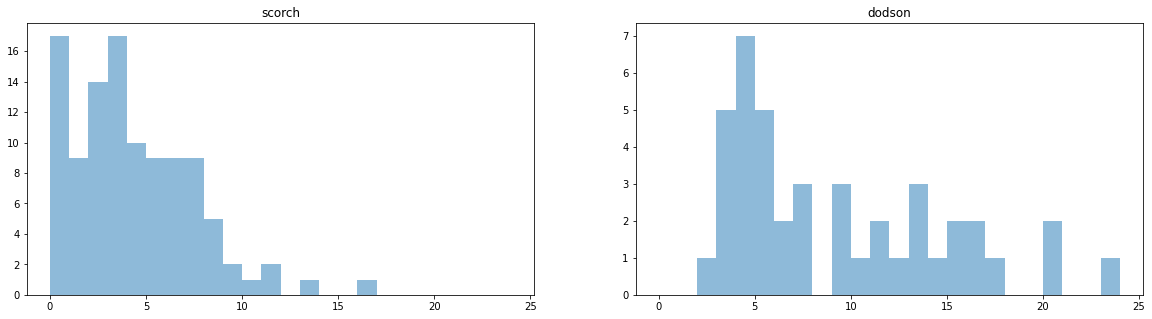

In [26]:
time_point_pull1_n0 = time_point_pull1.reset_index(drop = True)[0:time_point_pull1.shape[0]-1]
time_point_pull1_n1 = time_point_pull1.reset_index(drop = True)[1:time_point_pull1.shape[0]]
time_point_pull2_n0 = time_point_pull2.reset_index(drop = True)[0:time_point_pull2.shape[0]-1]
time_point_pull2_n1 = time_point_pull2.reset_index(drop = True)[1:time_point_pull2.shape[0]]
ipi_1 = time_point_pull1_n1.reset_index(drop = True) - time_point_pull1_n0.reset_index(drop = True)
ipi_2 = time_point_pull2_n1.reset_index(drop = True) - time_point_pull2_n0.reset_index(drop = True)
#
fig2, axs2 = plt.subplots(1,2)
fig2.set_figheight(5)
fig2.set_figwidth(20)
axs2[0].hist(ipi_1, alpha=0.5, bins=np.arange(0,25,1))
axs2[0].set_title(animal1)
axs2[1].hist(ipi_2, alpha=0.5, bins=np.arange(0,25,1))
axs2[1].set_title(animal2)
print('animal1 median',int(np.median(ipi_1)),'s')
print('animal2 median',int(np.median(ipi_2)),'s')

## train the dynamic bayesian network

In [27]:
import numpy as np
import pandas as pd
from pgmpy.models import BayesianModel
from pgmpy.models import DynamicBayesianNetwork as DBN
from pgmpy.estimators import BayesianEstimator
from pgmpy.estimators import HillClimbSearch,BicScore
import networkx as nx

[<TabularCPD representing P((pull1, 0):2) at 0x2b86fd0c8f40>,
 <TabularCPD representing P((owgaze2, 0):2) at 0x2b86fcf65520>,
 <TabularCPD representing P((pull2, 0):2) at 0x2b86fcf37190>,
 <TabularCPD representing P((owgaze1, 0):2) at 0x2b86fd0191c0>,
 <TabularCPD representing P((pull1, 1):2 | (owgaze1, 0):2) at 0x2b86fd0c8130>,
 <TabularCPD representing P((owgaze2, 1):2 | (pull2, 0):2) at 0x2b86fcf37550>,
 <TabularCPD representing P((pull2, 1):2 | (owgaze2, 0):2) at 0x2b86fcf37d30>,
 <TabularCPD representing P((owgaze1, 1):2 | (pull1, 0):2) at 0x2b86fcf65a90>]

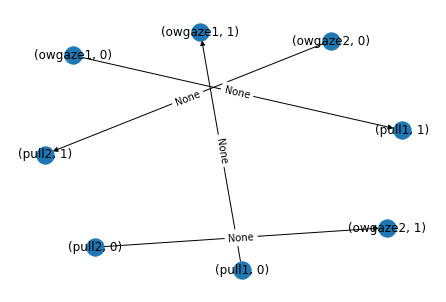

In [33]:
# real data
# total_time = int(720 - session_start_time)*2
total_time = int((720 - session_start_time)*2)
# # round to 0.5s
# time_point_pull1_round = round(time_point_pull1 * 2).reset_index(drop = True).astype(int)
# time_point_pull1_round = time_point_pull1_round[time_point_pull1_round<total_time]
# time_point_pull2_round  = round(time_point_pull2 * 2).reset_index(drop = True).astype(int)
# time_point_pull2_round = time_point_pull2_round[time_point_pull2_round<total_time]
# time_point_onewaygaze1_round = round(pd.Series(oneway_gaze1)*2).reset_index(drop = True).astype(int)
# time_point_onewaygaze2_round = round(pd.Series(oneway_gaze2)*2).reset_index(drop = True).astype(int)
# time_point_mutualgaze1_round = round(pd.Series(mutual_gaze1)*2).reset_index(drop = True).astype(int)
# time_point_mutualgaze2_round = round(pd.Series(mutual_gaze2)*2).reset_index(drop = True).astype(int)
# time_point_onewaygaze1_round = time_point_onewaygaze1_round[time_point_onewaygaze1_round>0]
# time_point_onewaygaze2_round = time_point_onewaygaze2_round[time_point_onewaygaze2_round>0]
# time_point_mutualgaze1_round = time_point_mutualgaze1_round[time_point_mutualgaze1_round>0]
# time_point_mutualgaze2_round = time_point_mutualgaze2_round[time_point_mutualgaze2_round>0]
# # round to 1s
time_point_pull1_round = round(time_point_pull1*2).reset_index(drop = True).astype(int)
time_point_pull1_round = time_point_pull1_round[time_point_pull1_round<total_time]
time_point_pull2_round  = round(time_point_pull2*2).reset_index(drop = True).astype(int)
time_point_pull2_round = time_point_pull2_round[time_point_pull2_round<total_time]
time_point_onewaygaze1_round = round(pd.Series(oneway_gaze1)*2).reset_index(drop = True).astype(int)
time_point_onewaygaze2_round = round(pd.Series(oneway_gaze2)*2).reset_index(drop = True).astype(int)
time_point_mutualgaze1_round = round(pd.Series(mutual_gaze1)*2).reset_index(drop = True).astype(int)
time_point_mutualgaze2_round = round(pd.Series(mutual_gaze2)*2).reset_index(drop = True).astype(int)
time_point_onewaygaze1_round = time_point_onewaygaze1_round[time_point_onewaygaze1_round>0]
time_point_onewaygaze2_round = time_point_onewaygaze2_round[time_point_onewaygaze2_round>0]
time_point_mutualgaze1_round = time_point_mutualgaze1_round[time_point_mutualgaze1_round>0]
time_point_mutualgaze2_round = time_point_mutualgaze2_round[time_point_mutualgaze2_round>0]
# t0
pull1_t0 = np.zeros((total_time,1))
pull1_t0[np.array(time_point_pull1_round)] = 1
pull2_t0 = np.zeros((total_time,1))
pull2_t0[np.array(time_point_pull2_round)] = 1
owgaze1_t0 = np.zeros((total_time,1))
owgaze1_t0[np.array(time_point_onewaygaze1_round)] = 1
owgaze2_t0 = np.zeros((total_time,1))
owgaze2_t0[np.array(time_point_onewaygaze2_round)] = 1
mtgaze1_t0 = np.zeros((total_time,1))
mtgaze1_t0[np.array(time_point_mutualgaze1_round)] = 1
mtgaze2_t0 = np.zeros((total_time,1))
mtgaze2_t0[np.array(time_point_mutualgaze2_round)] = 1
# t1
pull1_t1 = np.zeros((total_time,1))
pull1_t1[np.array(time_point_pull1_round)+1] = 1
pull2_t1 = np.zeros((total_time,1))
pull2_t1[np.array(time_point_pull2_round)+1] = 1
owgaze1_t1 = np.zeros((total_time,1))
owgaze1_t1[np.array(time_point_onewaygaze1_round)+1] = 1
owgaze2_t1 = np.zeros((total_time,1))
owgaze2_t1[np.array(time_point_onewaygaze2_round)+1] = 1
mtgaze1_t1 = np.zeros((total_time,1))
mtgaze1_t1[np.array(time_point_mutualgaze1_round)+1] = 1
mtgaze2_t1 = np.zeros((total_time,1))
mtgaze2_t1[np.array(time_point_mutualgaze2_round)+1] = 1
## create dataframe
# data = np.concatenate((pull1_t0,pull2_t0,owgaze1_t0,owgaze2_t0,mtgaze1_t0,mtgaze2_t0,pull1_t1,pull2_t1,owgaze1_t1,owgaze2_t1,mtgaze1_t1,mtgaze2_t1),axis = 1)
# colnames = [("pull1",0),("pull2",0),("owgaze1",0),("owgaze2",0),("mtgaze1",0),("mtgaze2",0),("pull1",1),("pull2",1),("owgaze1",1),("owgaze2",1),("mtgaze1",1),("mtgaze2",1)]
# df = pd.DataFrame(data, columns=colnames)
data = np.concatenate((pull1_t0,pull2_t0,owgaze1_t0,owgaze2_t0,pull1_t1,pull2_t1,owgaze1_t1,owgaze2_t1),axis = 1)
colnames = [("pull1",0),("pull2",0),("owgaze1",0),("owgaze2",0),("pull1",1),("pull2",1),("owgaze1",1),("owgaze2",1)]
df = pd.DataFrame(data, columns=colnames)

## built the model structure
# model = DBN(
#    [
#        (("owgaze1",0), ("pull1",1)),
#        (("owgaze1",0), ("mtgaze1",1)),
#        (("mtgaze1",0), ("pull1",1)),
#        (("pull1",0), ("owgaze1",1)),
#        (("owgaze2",0), ("pull2",1)),
#        (("owgaze2",0), ("mtgaze2",1)),
#        (("mtgaze2",0), ("pull2",1)),
#        (("pull2",0), ("owgaze2",1)),
#    ]
# )
model = DBN(
    [
        (("owgaze1",0), ("pull1",1)),
        (("pull1",0), ("owgaze1",1)),
        (("owgaze2",0), ("pull2",1)),
        (("pull2",0), ("owgaze2",1)),
    ]
)
model.fit(df)
#
pos=nx.spring_layout(model)
nx.draw(model,pos,with_labels = True)
labels = nx.get_edge_attributes(model,'weight')
nx.draw_networkx_edge_labels(model,pos,edge_labels=labels)

model.get_cpds()

### Methods used by Alec

In [34]:
def graph_to_matrix(edges,nevents,eventnames):

    output_matrix = np.zeros((nevents,nevents)) 
    
    column = 0
    for from_layer in np.arange(0,nevents,1):
        row = 0
        #Loop through the receiving nodes (the last timeslice of each population)
        for to_layer in np.arange(0,nevents,1): 
            from_pop = eventnames[from_layer]+'_t0'
            to_pop = eventnames[to_layer]+'_t1'

            if (from_pop, to_pop) in edges:
                output_matrix[row,column] = 1
            else:
                output_matrix[row,column] = 0
            row+=1
        column+=1
                    
    return output_matrix

In [35]:
def get_weighted_dags(binaryDags,nNewBootstraps = 100):
    ### Step 1: Create Bootstraps of "discrete" DAGs for weighted DAGs
    [nTrials,frNodes,toNodes] = binaryDags.shape
    
    bootstrap_graphs = np.zeros([nNewBootstraps,nTrials,frNodes,toNodes])
    for iBootstrap in range(nNewBootstraps):
        bootstrap_graphs[iBootstrap,:,:,:] = binaryDags[np.random.randint(nTrials, size=(nTrials)),:,:]

    ### Step 2: Get Weighted DAGs
    wtd_graphs = np.nanmean(bootstrap_graphs, axis=1)
    
    return wtd_graphs

In [36]:
# clean up dataframe
data = np.concatenate((pull1_t0,pull2_t0,owgaze1_t0,owgaze2_t0,pull1_t1,pull2_t1,owgaze1_t1,owgaze2_t1),axis = 1)
colnames = ["pull1_t0","pull2_t0","owgaze1_t0","owgaze2_t0","pull1_t1","pull2_t1","owgaze1_t1","owgaze2_t1"]
eventnames = ["pull1","pull2","owgaze1","owgaze2"]
nevents = np.size(eventnames)
bhv_df = pd.DataFrame(data, columns=colnames)

# define DBN structures
all_pops = list(bhv_df.columns)
from_pops = [pop for pop in all_pops if not pop.endswith('t1')]
to_pops = [pop for pop in all_pops if pop.endswith('t1')]
causal_whitelist = [(from_pop,to_pop) for from_pop in from_pops for to_pop in to_pops]

# train the DBN for the edges
bhv_hc = HillClimbSearch(bhv_df)
best_model = bhv_hc.estimate(max_indegree=None, white_list = causal_whitelist, scoring_method=BicScore(bhv_df))
edges = best_model.edges()
    
nFromNodes = nevents
nToNodes = nevents
nTrials = 1
DAGs = np.zeros((nTrials, nFromNodes, nToNodes))
DAGs[0,:,:] = graph_to_matrix(list(edges),nevents,eventnames)

edges


  0%|          | 0/1000000 [00:00<?, ?it/s]

OutEdgeView([('pull1_t0', 'owgaze2_t1'), ('pull2_t0', 'owgaze1_t1'), ('owgaze1_t0', 'owgaze1_t1')])

#### methods used by Alec - separate into different "trials"

In [32]:
# every 10s (20 0.5s steps) as a "trial"
# total 720s "session" will be 72 "trials"
ntrials = 72
nFromNodes = nevents
nToNodes = nevents
for itrial in np.arange(0,ntrials,1):
    bhv_df_itrial = bhv_df.iloc[itrial*20:(itrial+1)*20]
    # define DBN structures
    all_pops = list(bhv_df_itrial.columns)
    from_pops = [pop for pop in all_pops if not pop.endswith('t1')]
    to_pops = [pop for pop in all_pops if pop.endswith('t1')]
    causal_whitelist = [(from_pop,to_pop) for from_pop in from_pops for to_pop in to_pops]

    # train the DBN for the edges
    bhv_hc = HillClimbSearch(bhv_df_itrial)
    best_model = bhv_hc.estimate(max_indegree=None, white_list = causal_whitelist, scoring_method=BicScore(bhv_df))
    edges_itrial = best_model.edges()
    
    
    DAGs_itrial = np.zeros((ntrials, nFromNodes, nToNodes))
    DAGs_itrial[0,:,:] = graph_to_matrix(list(edges_itrial),nevents,eventnames)


weighted_graphs = get_weighted_dags(DAGs_itrial,nNewBootstraps = 1)
weighted_graphs

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

array([[[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]]])

## plot behavioral results (with camera 12) and eye contact results

In [45]:
time_point_pull1 = bhv_data["time_points"][bhv_data["behavior_events"]==1]
time_point_pull2 = bhv_data["time_points"][bhv_data["behavior_events"]==2]
ind_lookatotherface1 = np.where(np.array(look_at_face_or_not_camera12[animal1])==1)
time_point_lookatotherface1 = look_at_face_or_not_camera12["time_in_second"][ind_lookatotherface1]
ind_lookatotherface2 = np.where(np.array(look_at_face_or_not_camera12[animal2])==1)
time_point_lookatotherface2 = look_at_face_or_not_camera12["time_in_second"][ind_lookatotherface2]

ind_eyecontact1 = np.where(np.array(eye_contact_or_not_camera12[animal1])==1)
time_point_eyecontact1 = eye_contact_or_not_camera12["time_in_second"][ind_eyecontact1]
ind_eyecontact2 = np.where(np.array(eye_contact_or_not_camera12[animal2])==1)
time_point_eyecontact2 = eye_contact_or_not_camera12["time_in_second"][ind_eyecontact2]

# calculate the oneway gaze or mutual gaze
animal1_gaze = np.round(np.concatenate((time_point_eyecontact1,time_point_lookatotherface1)),1)
animal1_gaze = np.unique(np.sort(animal1_gaze))
animal2_gaze = np.round(np.concatenate((time_point_eyecontact2,time_point_lookatotherface2)),1)
animal2_gaze = np.unique(np.sort(animal2_gaze))

ngaze1 = len(animal1_gaze)
ngaze2 = len(animal2_gaze)
oneway_gaze1 = []
oneway_gaze2 = []
mutual_gaze1 = []
mutual_gaze2 = []
# 
for igaze1 in np.arange(0, ngaze1, 1):
    for igaze2 in np.arange(0,ngaze2,1):
        if abs(animal1_gaze[igaze1]-animal2_gaze[igaze2])<1:
            mutual_gaze1.append(animal1_gaze[igaze1])
            mutual_gaze2.append(animal2_gaze[igaze2])
mutual_gaze1 = np.unique(mutual_gaze1)   
mutual_gaze2 = np.unique(mutual_gaze2)
oneway_gaze1 = animal1_gaze[~np.isin(animal1_gaze,mutual_gaze1)]
oneway_gaze2 = animal2_gaze[~np.isin(animal2_gaze,mutual_gaze2)]

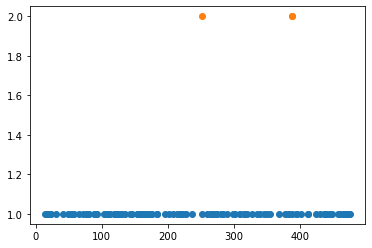

In [46]:
time_point_pull1 = np.round(time_point_pull1,2)
ind_plot = time_point_pull1 < (720 - session_start_time)
plt.plot(time_point_pull1[ind_plot], np.ones(np.shape(time_point_pull1[ind_plot])[0]),'o')
plt.plot(oneway_gaze1, np.ones(np.shape(oneway_gaze1)[0])*2,'o')
plt.plot(mutual_gaze1, np.ones(np.shape(mutual_gaze1)[0])*3,'o')

In [47]:
(time_point_eyecontact1+session_start_time)/60

array([4.64944444, 6.91555556, 6.91666667])

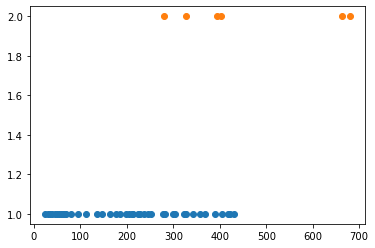

In [48]:
time_point_pull2 = np.round(time_point_pull2,2)
ind_plot = time_point_pull2 < (720 - session_start_time)
plt.plot(time_point_pull2[ind_plot], np.ones(np.shape(time_point_pull2[ind_plot])[0]),'o')
plt.plot(oneway_gaze2, np.ones(np.shape(oneway_gaze2)[0])*2,'o')
plt.plot(mutual_gaze2, np.ones(np.shape(mutual_gaze2)[0])*3,'o')

## plot behavioral results (with camera 23) and eye contact results

In [49]:
time_point_pull1 = bhv_data["time_points"][bhv_data["behavior_events"]==1]
time_point_pull2 = bhv_data["time_points"][bhv_data["behavior_events"]==2]
ind_lookatotherface1 = np.where(np.array(look_at_face_or_not_camera23[animal1])==1)
time_point_lookatotherface1 = look_at_face_or_not_camera23["time_in_second"][ind_lookatotherface1]
ind_lookatotherface2 = np.where(np.array(look_at_face_or_not_camera23[animal2])==1)
time_point_lookatotherface2 = look_at_face_or_not_camera23["time_in_second"][ind_lookatotherface2]

ind_eyecontact1 = np.where(np.array(eye_contact_or_not_camera23[animal1])==1)
time_point_eyecontact1 = eye_contact_or_not_camera23["time_in_second"][ind_eyecontact1]
ind_eyecontact2 = np.where(np.array(eye_contact_or_not_camera23[animal2])==1)
time_point_eyecontact2 = eye_contact_or_not_camera23["time_in_second"][ind_eyecontact2]

# calculate the oneway gaze or mutual gaze
animal1_gaze = np.round(np.concatenate((time_point_eyecontact1,time_point_lookatotherface1)),1)
animal1_gaze = np.unique(np.sort(animal1_gaze))
animal2_gaze = np.round(np.concatenate((time_point_eyecontact2,time_point_lookatotherface2)),1)
animal2_gaze = np.unique(np.sort(animal2_gaze))

ngaze1 = len(animal1_gaze)
ngaze2 = len(animal2_gaze)
oneway_gaze1 = []
oneway_gaze2 = []
mutual_gaze1 = []
mutual_gaze2 = []
# 
for igaze1 in np.arange(0, ngaze1, 1):
    for igaze2 in np.arange(0,ngaze2,1):
        if abs(animal1_gaze[igaze1]-animal2_gaze[igaze2])<1:
            mutual_gaze1.append(animal1_gaze[igaze1])
            mutual_gaze2.append(animal2_gaze[igaze2])
mutual_gaze1 = np.unique(mutual_gaze1)   
mutual_gaze2 = np.unique(mutual_gaze2)
oneway_gaze1 = animal1_gaze[~np.isin(animal1_gaze,mutual_gaze1)]
oneway_gaze2 = animal2_gaze[~np.isin(animal2_gaze,mutual_gaze2)]

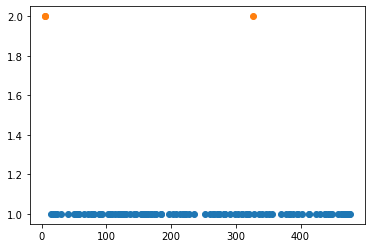

In [50]:
time_point_pull1 = np.round(time_point_pull1,2)
ind_plot = time_point_pull1 < (720 - session_start_time)
plt.plot(time_point_pull1[ind_plot], np.ones(np.shape(time_point_pull1[ind_plot])[0]),'o')
plt.plot(oneway_gaze1, np.ones(np.shape(oneway_gaze1)[0])*2,'o')
plt.plot(mutual_gaze1, np.ones(np.shape(mutual_gaze1)[0])*3,'o')

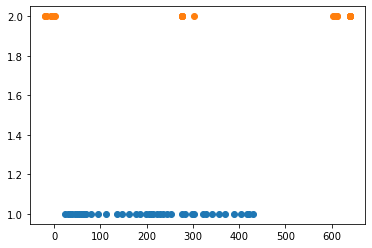

In [51]:
time_point_pull2 = np.round(time_point_pull2,2)
ind_plot = time_point_pull2 < (720 - session_start_time)
plt.plot(time_point_pull2[ind_plot], np.ones(np.shape(time_point_pull2[ind_plot])[0]),'o')
plt.plot(oneway_gaze2, np.ones(np.shape(oneway_gaze2)[0])*2,'o')
plt.plot(mutual_gaze2, np.ones(np.shape(mutual_gaze2)[0])*3,'o')